In [115]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

unemployment = pd.read_csv('Data/clean_unemployment.csv')


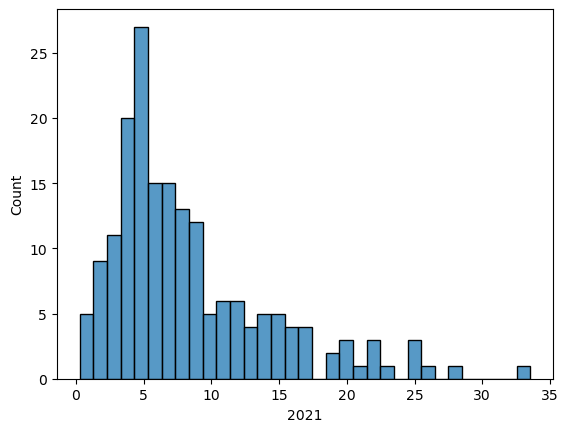

In [116]:
sns.histplot(unemployment, x='2021', binwidth=1)
plt.show()

In [117]:
not_oceania = ~unemployment['continent'].isin(['Oceania'])      # adding tilde negates or 'reverses' the truth value 
                                                                # not in Oceania = True ; in Oceania = False
unemployment[not_oceania].head(10)      # now shows countries that are not in Oceania

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
5,ARM,Armenia,Asia,19.01,18.44,17.30,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90
7,AUT,Austria,Europe,4.82,4.56,4.87,5.33,5.62,5.72,6.01,5.50,4.85,4.49,5.36,6.30
8,AZE,Azerbaijan,Asia,5.63,5.42,5.19,4.97,4.91,4.96,5.00,5.00,4.90,4.85,6.46,6.58
9,BDI,Burundi,Africa,1.61,1.60,1.59,1.58,1.57,1.60,1.59,1.59,1.59,1.59,1.71,1.79
10,BEL,Belgium,Europe,8.29,7.14,7.54,8.43,8.52,8.48,7.83,7.09,5.95,5.36,5.55,6.42


0.26 33.56


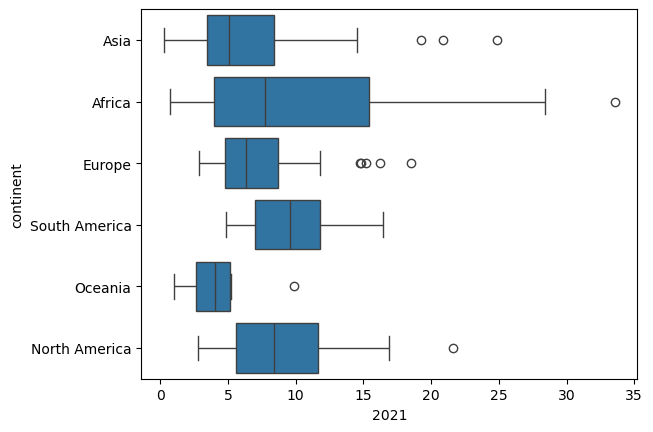

In [118]:
yr_2021 = unemployment['2021']

print(yr_2021.min(), yr_2021.max())

sns.boxplot(unemployment, x='2021', y='continent')
plt.show()

In [119]:
# groupby() views can be customized with user-defined column names and
# specific aggregation functions per column 

continent_summary = unemployment.groupby('continent').agg(
    mean_rate_2021=('2021','mean'),
    std_rate_2021=('2021', 'std')
)

continent_summary

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


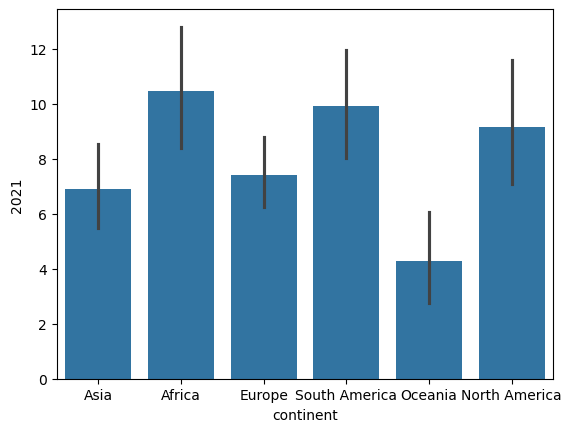

In [120]:
# Barplot automatically gets the average 
sns.barplot(unemployment, x='continent', y='2021')
plt.show()

In [121]:
# Returns the columns where there are missing values

unemployment.columns[unemployment.isna().sum() > 0]

Index(['continent'], dtype='object')

In [122]:
# Returns the specific data points with missing values for continent

cols_with_na = unemployment.loc[unemployment['continent'].isna(), ['country_name', 'continent']]

cols_with_na

,country_name,continent
65,Guam,NaN
67,"Hong Kong SAR, China",NaN
99,"Macao SAR, China",NaN
117,New Caledonia,NaN
132,Puerto Rico,NaN


In [123]:
# Manual imputation

unemployment.loc[65, 'continent'] = 'South America'
unemployment.loc[67, 'continent'] = 'Asia'
unemployment.loc[99, 'continent'] = 'Asia'
unemployment.loc[117, 'continent'] = 'Oceania'
unemployment.loc[132, 'continent'] = 'South America'

unemployment.loc[[65, 67, 99, 117, 132], ['country_name','continent']]

# Missing values now handled

,country_name,continent
65,Guam,South America
67,"Hong Kong SAR, China",Asia
99,"Macao SAR, China",Asia
117,New Caledonia,Oceania
132,Puerto Rico,South America


In [124]:
planes = pd.read_csv('Data/planes.csv')

In [125]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [126]:
# generally, missing values to be dropped typically account for 5% of the total data
threshold = planes.shape[0] * 0.05

cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)

In [127]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [128]:
planes['Additional_Info'].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

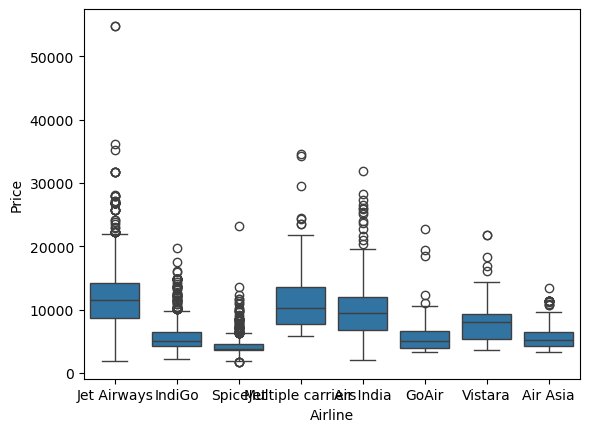

In [129]:
sns.boxplot(planes, y='Price', x='Airline')
plt.show()

In [130]:
# The 'Additional_Info' column can be dropped since it does not provide
# much help during the EDA process. It's also cluttery

planes = planes.drop(columns='Additional_Info', axis=1)

In [131]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,11087.0


In [132]:
# calculating median price per airline and converting it to a dictionary for imputation
airline_prices = planes.groupby('Airline')['Price'].agg('median')
prices_dict = airline_prices.to_dict()

# mapping the missing prices using the dictionary for each airline
# 'inplace = True' may also be used instead of reassigning to the dataframe

planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [133]:
# CATEGORICAL DATA
# the code below demonstrates a technique for aggregating categorical data when
# 're-categorization' is required in order to better describe said data (e.g.: plotting)


import numpy as np  # we use numpy for 'np.select()'


non_numeric = planes.select_dtypes('object')

for col in non_numeric.columns:
    print(f'Number of unique values in {col} column: ', non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [134]:
planes['Duration'].head()

# It would be tedious to illustrate flight duration with its current formatting.
# To make this data suitable for visualization, we can categorize the duration column

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [135]:
flight_categories = ['Short-haul', 'Medium', 'Long-haul']
short_flights = '^0h|^1h|^2h|^3h|^4h'   #add carets to each value to avoid mistakingly assigning '10h' as a short flight
medium_flights = '^5h|^6h|^7h|^8h|^9h'
long_flights = '^10h|^11h|^12h|^13h|^14h|^15h|^16h'

conditions = [
    (planes['Duration'].str.contains(short_flights)),
    (planes['Duration'].str.contains(medium_flights)),
    (planes['Duration'].str.contains(long_flights))
]

planes['Duration_Category'] = np.select(
    conditions, flight_categories, default='Other'
    )

planes['Duration_Category'].head()

0         Other
1        Medium
2    Short-haul
3    Short-haul
4     Long-haul
Name: Duration_Category, dtype: object

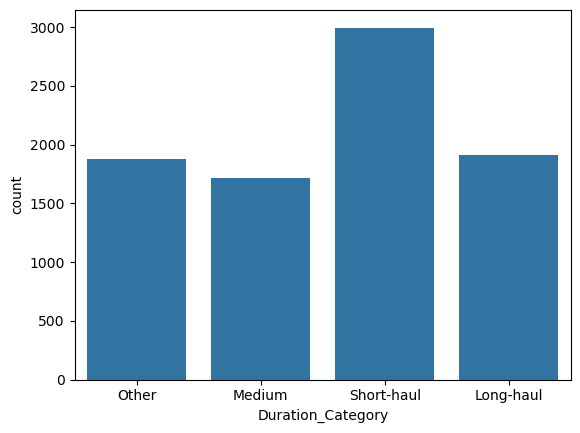

In [136]:
sns.countplot(planes, x='Duration_Category')
plt.show()
# Flight duration appropriately visualized

In [137]:
# Just a note to remember how axes work in Pandas, lol
dff = pd.DataFrame(np.random.randint(1, 10, size=(3, 2)), columns=list('AB'))

print(dff)
print()
print(dff.sum(axis=1))

   A  B
0  9  3
1  8  1
2  9  6

0    12
1     9
2    15
dtype: int64


In [152]:
# NUMERICAL DATA
# Here, we want to add a summary statistic to our dataframe; that is 
# price std_dev for each airline

planes['airline_price_st_dev'] = planes.groupby('Airline')['Price'].transform(lambda x : x.std())
planes[['Airline', 'airline_price_st_dev']].value_counts()

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64

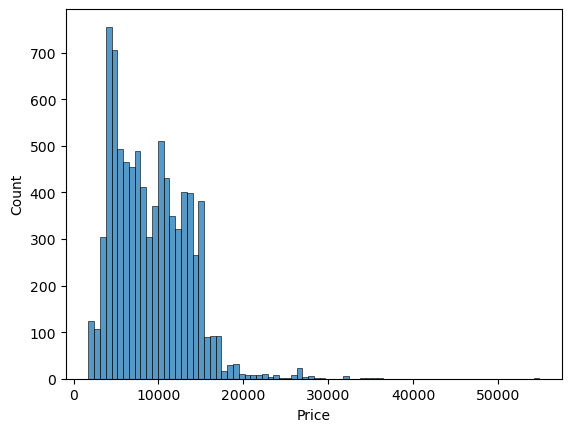

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [160]:
# OUTLIERS

sns.histplot(data=planes, x='Price')
plt.show()

print(planes['Price'].describe())
# Notice the distribution is right-skewed due to upper extreme values

In [167]:
# Calculated IQR to find outliers beyond the upper and lower limits.
# Also subset the data excluding extreme values

percentile_25 = planes['Price'].quantile(0.25)
percentile_75 = planes['Price'].quantile(0.75)
planes_IQR = percentile_75 - percentile_25

outlier_lower_bound = percentile_25 - (1.5 * planes_IQR)
outlier_upper_bound = percentile_75 + (1.5 * planes_IQR)

print(f'Lower Bound : {outlier_lower_bound}  Upper Bound {outlier_upper_bound}\n')

no_price_outliers = planes[ (planes['Price'] > outlier_lower_bound) & (planes['Price'] < outlier_upper_bound) ]


Lower Bound : -5293.0  Upper Bound 22763.0

